# Text Classification

In [1]:
#Import the Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import re
import shutil
import string
from tensorflow.keras import layers
from tensorflow.keras import losses

In [2]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

os.listdir(dataset_dir)

train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

84125825/84125825 ━━━━━━━━━━━━━━━━━━━━ 378s 4us/step


['labeledBow.feat',
 'neg',
 'pos',
 'unsup',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [3]:
#write a sample positive review
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file, 'r') as f:
    text = f.read()
    print(text)

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [4]:
#remove the dataset directory without positive and negative reviews:
remove_dir = os.path.join(train_dir, 'unsup')
#if os.path.exists(remove_dir):
shutil.rmtree(remove_dir)

In [5]:
#Change the dataset with validation data:
batch_size = 32
seed = 42
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train'
    , batch_size=batch_size, validation_split=0.2, subset='training', seed=seed
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [6]:
#Check the Reviews with Labels:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(3):
        print('Review', text_batch.numpy()[i])
        print('Label', label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [7]:
#Check the class_names of raw train dataset:
print("Label 0 corrspends to", raw_train_ds.class_names[0])
print("Label 1 corrspends to", raw_train_ds.class_names[1])

Label 0 corrspends to neg
Label 1 corrspends to pos


In [9]:
#splits the overlapping of validation dataset
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    validation_split=0.2,
    batch_size = batch_size,
    seed = seed,
    subset = 'validation'
)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [10]:
#Check the test dataset:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size
)

Found 25000 files belonging to 2 classes.


In [12]:
#Prepare the dataset for training , so we normalized the data from punctions and html tags and convert it into the Tokens
#and Vectorized form.
def customize_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html, '[%s]' % re.escape(string.punctuation), '')

In [13]:
#Make the TextVectorization layer with max_features and sequence_length:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    max_tokens=max_features,
    output_sequence_length=sequence_length,
    output_mode = 'int',
    standardize = custom_standardization

)

In [14]:
#Make only text dataset without labels called adapt.
train_text = raw_train_ds.map(lambda x, y:x)
vectorize_layer.adapt(train_text)

In [15]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [17]:
# reterive the batch from the dataset:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print('Review :' ,first_review)
print("Label :", raw_train_ds.class_names[first_label])
print('Vectorized Review :', vectorize_text( first_review, first_label))

Review : tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label : neg
Vectorized Review : (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
 

In [18]:
#Print the each string into integer vocabulary using .get_vocabulary:
print(vectorize_layer.get_vocabulary()[1287])
print(vectorize_layer.get_vocabulary()[113])
print('Vocabulary Size: {}'.format(len(vectorize_layer.get_vocabulary())))

silent
best
Vocabulary Size: 10000


In [19]:
# Create the train, test and validation dataset from TextVectorization:
train_ds = raw_train_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)

In [26]:
#Apply the cache, prefetch, AUTOTUNE method to data for train_ds, test_ds and val_ds:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
embadding_dim = 16


In [43]:
#Fit the Mode:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, embadding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [44]:
#Now compile the model:
model.compile(optimizer='adam', loss= losses.BinaryCrossentropy(), metrics=[tf._metrics.BinaryAccuracy(threshold=0.5)])

In [45]:
#Fit the Model:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - binary_accuracy: 0.5832 - loss: 0.6814 - val_binary_accuracy: 0.7496 - val_loss: 0.6170
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - binary_accuracy: 0.7579 - loss: 0.5846 - val_binary_accuracy: 0.8084 - val_loss: 0.5050
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - binary_accuracy: 0.8205 - loss: 0.4727 - val_binary_accuracy: 0.8344 - val_loss: 0.4290
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - binary_accuracy: 0.8455 - loss: 0.3998 - val_binary_accuracy: 0.8426 - val_loss: 0.3883
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - binary_accuracy: 0.8650 - loss: 0.3523 - val_binary_accuracy: 0.8562 - val_loss: 0.3579
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - binary_accuracy: 0.8805 - loss: 0.3187 - val_binary_accuracy: 0.8574 - val_loss: 0.3411
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - binary_accuracy: 0.8881 - loss: 0.2943 - val_binary_accuracy: 0.8564 - val_loss: 0.330

In [46]:
#Evaluate the Model:
loss, acc = model.evaluate(train_ds)
print(f'Train loss: {loss:.3f}, Train accuracy: {acc:.3f}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.9149 - loss: 0.2321
Train loss: 0.231, Train accuracy: 0.915


In [47]:
#Fit the  history with history_dict:
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

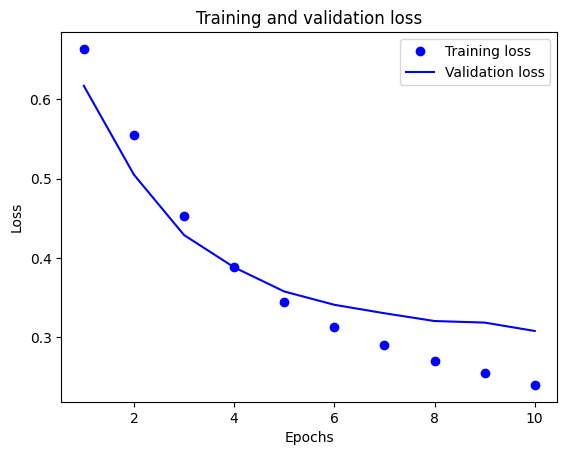

In [50]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

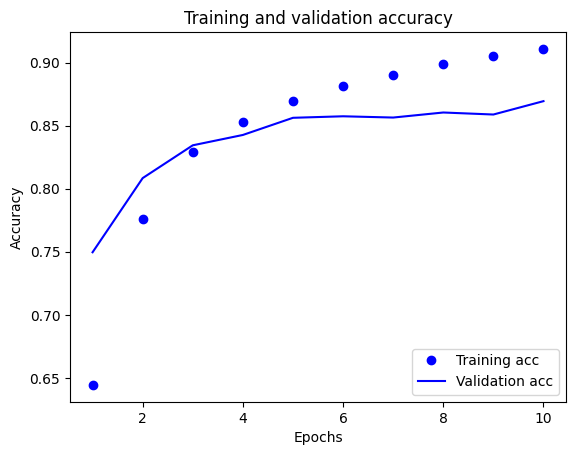

In [52]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [58]:
#Save the Model:
model.save('txt_model.h5')

In [56]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)


In [57]:
#Predict the Model:
examples = tf.constant([
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
])

export_model.predict(examples)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


array([[0.5973877 ],
       [0.5585869 ],
       [0.54303485]], dtype=float32)